In [1]:
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
BASE_DIRECTORY = os.getcwd()

def get_data(Tagetname):
    data_list = []
    name_list = []
    for (dirpath, dirnames, filenames) in os.walk(os.path.join(BASE_DIRECTORY, "data")):
        # Opening JSON file
        for filename in filenames:
            if Tagetname in filename:
                try:
                    with open(os.path.join(dirpath, filename)) as json_file:
                        data_list.append(json.load(json_file))
                        name_list.append(filename.split("_")[0])
                except:
                    print(filename, "could not be read")
    return data_list, name_list


In [2]:
def color(name):
    if "Gaussian" in name:
        return "blue"
    if "numpyro" in name:
        return "red"
    if "BOHAMIANN" in name:
        return "green"
    return "black"

def analysis_regression_performance(problem=  "Rosenbrock_dim_10"):
    data_list,name_list = get_data(problem)
    fig, ax = plt.subplots(1,2, figsize=(10, 8))
    for data, name in zip(data_list,name_list):
        ax[0].plot(data["n_train_points_list"], data["mean_abs_pred_error"], color =color(name) , label=name)
    #fig, ax = plt.subplots()
    for data, name in zip(data_list,name_list):
        ax[1].plot(data["n_train_points_list"], data["mean_uncertainty_quantification"],color =color(name) , label=name)
    #ax[1].legend()

    ax[0].set_title("mean_abs_pred_error")
    ax[1].set_title("mean_uncertainty_quantification")
    print(problem)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())


Rosenbrock_dim_10


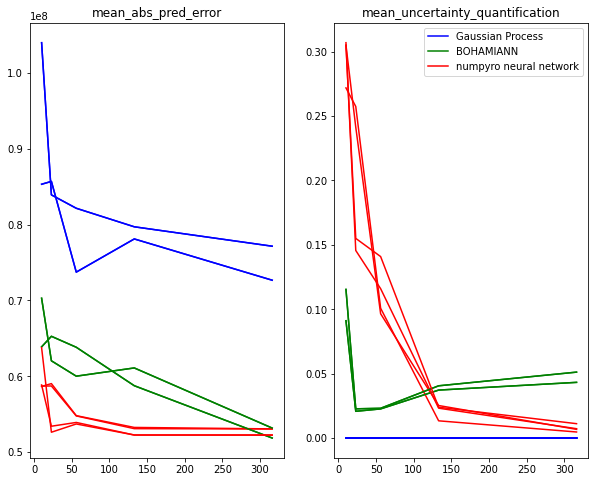

In [7]:
analysis_regression_performance()

Rosenbrock_dim_2


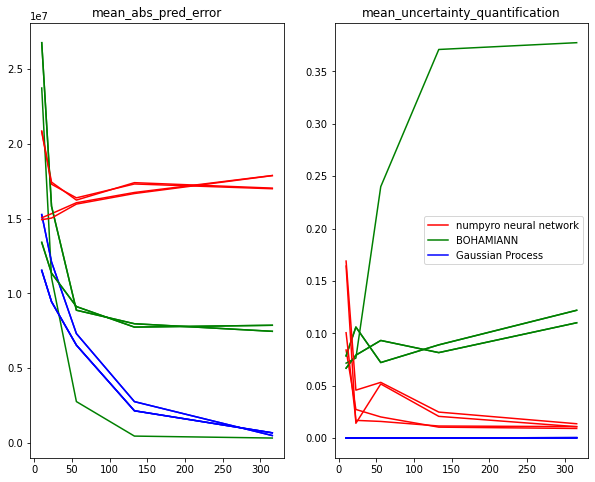

In [4]:
analysis_regression_performance("Rosenbrock_dim_2")

Zi


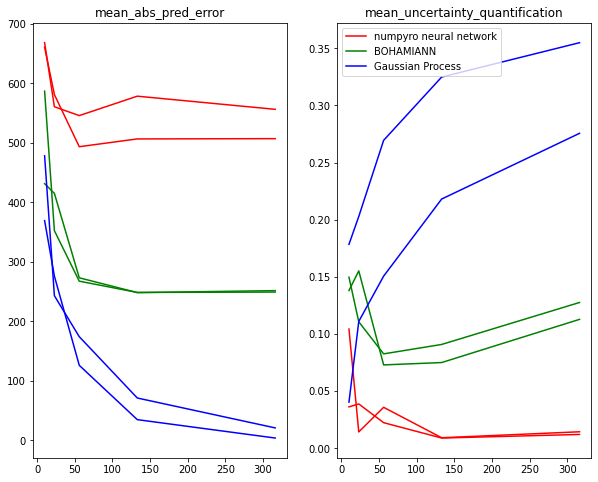

In [5]:
analysis_regression_performance("Zi")

Wei


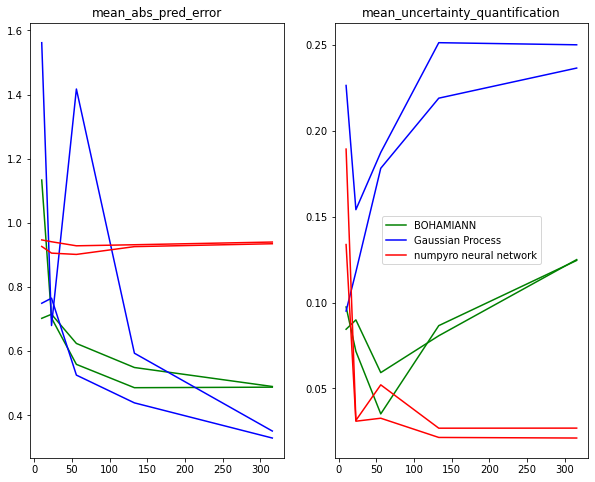

In [6]:
analysis_regression_performance("Wei")